In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# read training data
data = pd.read_csv('Shopping_Revenue.csv')

print(f"Shape of training data: {data.shape}\nFeatures available: {data.columns}")

Shape of training data: (137, 43)
Features available: Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


In [2]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [3]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [4]:
data.fillna(0, inplace=True)

data.isnull().sum().any()


False


* Missing Value has been replaced by 0.
* Last column 'revenue' is our target column.
* Features from P1 to P37 are all numerical features about which we know nothing specifically. So, I will directly feed them into my model.
* Id column is redundant, I will drop it. To avoid it we can choose it as index column while reading data.i.e., using pd.read_csv('*filepath*',index_col=*col_name_or_positional_no*)
* In feature Open date, I will focus on month and year and drop date values.
* City, City Group and Type are categorical columns. To feed them to ML model they need to be converted into machine-readable form which is numerical form.

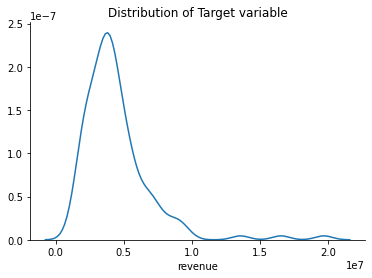

In [5]:
sns.distplot(data['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine(); #to remove top and right spines

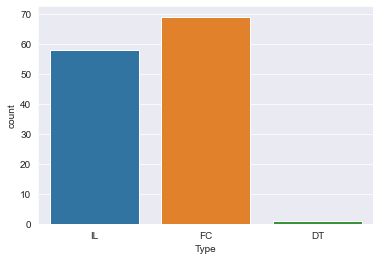

In [6]:
data = data[data['revenue']<8e+06].copy()

sns.set_style('darkgrid')
sns.countplot(data["Type"])

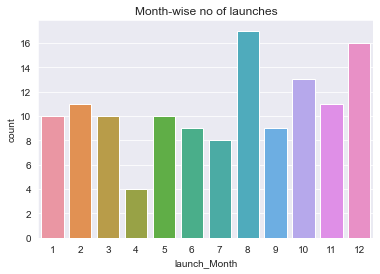

In [7]:
data['Open Date'] = pd.to_datetime(data['Open Date'])
data['launch_Month'] = [x.month for x in data['Open Date']]
data['launch_year'] = [x.year for x in data['Open Date']]
data.drop(['Id','Open Date'],axis=1,inplace=True)

sns.countplot(data['launch_Month'])
plt.title('Month-wise no of launches');

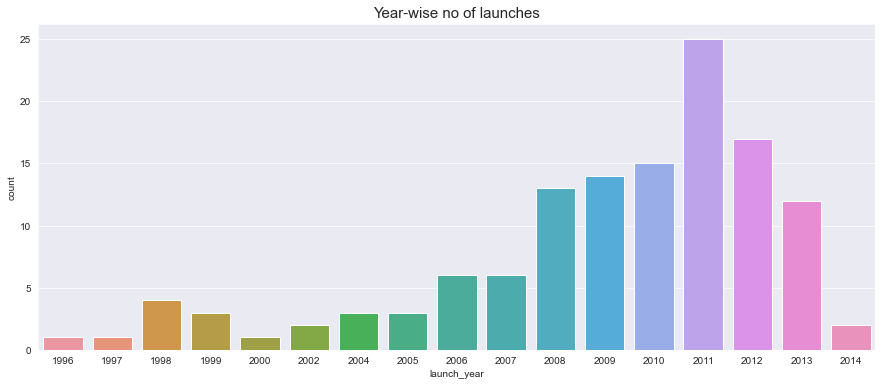

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(data['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [11]:
## Preprocessing the data

data['Type'].value_counts()

FC    69
IL    58
DT     1
Name: Type, dtype: int64

In [13]:
data['City Group'].value_counts()

Big Cities    69
Other         59
Name: City Group, dtype: int64

In [14]:
data['City'].value_counts()

İstanbul          43
Ankara            19
İzmir              7
Samsun             5
Bursa              5
Antalya            4
Sakarya            4
Diyarbakır         3
Tekirdağ           3
Eskişehir          3
Adana              3
Kayseri            3
Trabzon            2
Aydın              2
Konya              2
Muğla              2
Denizli            1
Kastamonu          1
Gaziantep          1
Balıkesir          1
Bolu               1
Kütahya            1
Isparta            1
Afyonkarahisar     1
Şanlıurfa          1
Kırklareli         1
Amasya             1
Osmaniye           1
Tokat              1
Uşak               1
Kocaeli            1
Karabük            1
Elazığ             1
Edirne             1
Name: City, dtype: int64

In [15]:
len(data['City'].unique())

34

**Oops!** There are 34 different City values. I can create dummy variables to handle this feature but it will lead to so many columns. A good approach will be to reduce categories in this column. For example, instead of cities categories can be different zones or tier-1,tier-2 and so on.
Here, I am dropping this column as there is not much information about which countries are involved. Also, the feature City Group covers effect of this feature as well.

In [16]:
data.drop('City',axis=1,inplace=True)

In [17]:
#converting other categorical columns
data['Type'] = data['Type'].map({'FC':0,'IL':1,'DT':2})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data['City Group'] = encoder.fit_transform(np.array(data['City Group']).reshape(-1,1))
data['City Group'] = data['City Group'].apply(int)

In [18]:
data.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

Revenue is a bit higher in months of Jan, Sept and  Nov.

In [19]:
data.groupby('launch_year')['revenue'].mean()

launch_year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2002    4.991022e+06
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

* Year 2000 has recorded highest revenues.
* Years 2005, 2013 and 2014 proved to be worst years for restaurants. Though number of observations is too low for year 2014, may be the big picture is differnt from this

In [20]:
# creating dummy variables
data.launch_year = data.launch_year.astype(str)
data.launch_Month = data.launch_Month.astype(str)
year_dummy = pd.get_dummies(data[['launch_year','launch_Month']],drop_first=True)
dataa = pd.concat([data,year_dummy],axis=1)
data.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [22]:
## Modeling

# Split train data further into training and testing sets to see performance of each ML model.
# Then, apply models.

from sklearn.model_selection import train_test_split
X=data.drop('revenue',axis=1)
y=data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12345)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

,MAE,MSE,R2-score
Linear Regression,1.657670e+06,3.643539e+12,-0.437851
Logistic Regression,1.334524e+06,2.589196e+12,-0.021775
Decision Tree,1.485496e+06,3.874435e+12,-0.528969
Random Forest,1.026204e+06,1.557502e+12,0.385363
Support Vector Machines,1.407327e+06,2.555855e+12,-0.008617
K-nearest Neighbors,1.192772e+06,2.042362e+12,0.194022
XGBoost,1.140804e+06,1.823674e+12,0.280323


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = { "random_state": [0,1], 'bootstrap': [True,False], 'max_depth': [10], 'max_features': ['log2'], 'n_estimators': [5, 6, 7, 9, 10]}

rfr = RandomForestRegressor()

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train);

print(g_search.best_params_)
print(g_search.score(X_test, y_test))

{'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 9, 'random_state': 0}
0.3588916570500771


In [27]:
random = RandomForestRegressor(random_state=0, max_depth = 10, max_features = 'log2', n_estimators = 9, bootstrap =False)

random.fit(X_train,y_train)

y_pred1 = random.predict(X_test) 
from sklearn import metrics 
print("Accuracy:",metrics.r2_score(y_test, y_pred1))

Accuracy: 0.3588916570500771
